# Problem Statement
The data scientists at BigMart have collected **2013 sales data** for **1559 products** across **10 stores** in **different cities**. Also, certain attributes of each product and store have been defined. The aim is to **build a predictive model** and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Please note that the **data may have missing values** as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

![](https://media.giphy.com/media/VTXzh4qtahZS/giphy.gif)

## Data
We have a train (8523 observations) and test (5681 observations) dataset, the train data set has both input and output variable(s). We need to predict the sales for the test dataset.


|Variable|Description|
|---|---|
|Item_Identifier|Unique Product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visability|The % of the total display area of all products in a store allocated to the particular product|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in a particular store. This is the outcome variable to be predicted.|

## Plan of attack
We'll explore the problem using the following steps:
1. **Hypothesis Generation**: Understand the problem by brainstorming ideas about how the outcome can be affected by possible factors
	* Store level hypothesis
	* Product level hypothesis
2. **Data Exploration**: Look at the categorical and continuous features and make inferences about the data
3. **Data Cleaning**: Check the data for missing and incorrect values, outliers. Think about strategies on how to deal with these observations.
4. **Feature Engineering (Optional)**: Modify the existing variables and create new ones
5. **Modelling**: Make predictive models on the data. Try to create a reusable pipeline for all the models.
	* Linear Regression
	* Decision Tree
	* Random Forest
	* SVR (Support Vector Regreesion)
	* XGBoost

## Additional Notes
* Combine the two datasets to do all the needed data preprocessing. After applying all the preprocessing, split the datasets again.
* Compare the model results using metrics and visualization graphics.


In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline

In [3]:
SEED = 42
np.random.seed(SEED)

### 1. Hypothesis Generation
#### Store Level Hypothesis
✅ - We have data about these hypothesis.
* **<span style="color:Green">Place</span>**: Stores in the urban places will have higher sales because there are more people in the urban areas rather than in the villages. ✅
* **<span style="color:red">Population</span>**: Stores placed in locations with higher population will generate higher sales because of the demand.
* **<span style="color:red">Feedback</span>**: Stores with more positive feedback, will have higher sales because of the comfortable environment and the kind employees.
* **<span style="color:red">Competitors</span>**: Stores which have competitors nearby will generate lower sales because of more competition.
* **<span style="color:red">Marketing</span>**: Stores which have good advertising (TV ads and paper catalogs) will generate higher sales.
* **<span style="color:Green">Location</span>**: Stores which are in more famous locations will generate higher sales. ✅
* **<span style="color:Green">Store Capacity</span>**: Stores with higher capacity will generate higher sales because they will have a diverse range of products and many product units. ✅
* **<span style="color:red">Work Hours</span>**: Stores which have longer working hours will generate higher sales.
* **<span style="color:red">Payment Types</span>**: Stores which are offering many types of payment will generate higher sales.
* **<span style="color:red">Place of payment</span>**: Stores which are offering some kind of recompense if the client is waiting too much will generate higher sales.
* **<span style="color:red">Toys for Kids</span>**: Stores which are offering some types of free toys for the kids when you spent a certain amount of money will generate higher sales.
* **<span style="color:red">Mobile App</span>**: Stores which have a mobile application will generate higher sales because of the convenient to look at the weekly offers.
* **<span style="color:red">Product Returns</span>**: Stores which are offering product returns will generate higher sales because of the emotional sense of loyalty.
* **<span style="color:red">Shopping Type</span>** Stores which are offering online shopping will generate higher sales because of the customers' saved time and convenience.
* **<span style="color:red">Data Analysis, ML</span>**: Stores which are using data analysis and machine learning on their historical data will generate higher sales. 😃
* **<span style="color:red">Demographics</span>**: Based on race, some races can generate higher sales
* **<span style="color:red">Income</span>**: Based on the income, people with higher income can generate higher sales
* **<span style="color:red">Political Vision</span>**: People with are with conservative political vision maybe will generate higher sales 
* **<span style="color:red">Weather</span>**: Based on the weather conditions people can generate higher sales

#### Product Level Hypothesis
* **<span style="color:Green">Visibility</span>**: Better-placed products will generate higher sales because more people are looking at them, so there is a high chance to buy some of them. ✅
* **<span style="color:Green">Product Diversity</span>**: Stores which are selling many types of products (supermarkets) will have higher sales because people will buy many products of them. ✅
* **<span style="color:red">Promotions</span>**: Products which have a promotion will generate higher sales.
* **<span style="color:red">Quality</span>**: Products with higher quality will generate higher sales.
* **<span style="color:red">Brand</span>**: Branded products will generate higher sales because of the trust in the customers.
* **<span style="color:Green">Daily Products</span>**: Stores which are offering daily-used products will generate higher sales because of the high demand. ✅
* **<span style="color:red">Bioproducts</span>** Stores which are offering bioproducts will generate higher sales because people want to be healthy.
* **<span style="color:Green">Price</span>**: Products which have lower prices will generate higher sales. ✅
* **<span style="color:red">Expiration Date of Product</span>**: If the product expiration date is going to expire in 2-3 days are the people going to take this product?

|Variable|Description|Relation to Hypothesis|
|---|---|---|
|Item_Identifier|Unique Product ID|ID Variable|
|Item_Weight|Weight of product|Not considered in hypothesis|
|Item_Fat_Content|Whether the product is low fat or not|Linked to "Daily Products" hypothesis. Low-fat products are used more.|
|Item_Visability|The % of the total display area of all products in a store allocated to the particular product|Linked to "Visibility" hypothesis.|
|Item_Type|The category to which the product belongs|Linked to "Product Diversity" hypothesis|
|Item_MRP|Maximum Retail Price (list price) of the product|Linked to "Price" hypothesis|
|Outlet_Identifier|Unique store ID|ID Variable|
|Outlet_Establishment_Year|The year in which store was established|Not considered in hypothesis|
|Outlet_Size|The size of the store in terms of ground area covered|Considered in the "Store Capacity" hypothesis|
|Outlet_Location_Type|The type of city in which the store is located|Considered in "Location" hypothesis|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|Considered in the "Supermarket" hypothesis|
|Item_Outlet_Sales|Sales of the product in a particular store. This is the outcome variable to be predicted.|Outcome Variable|

### Part 2: Exploratory Data Analysis

In [4]:
data = pd.read_csv("Train_Data.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Let's look at a consice summary about the data. Here, we can see the column types and missing data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


We can see that there are missing values for the **Item_Weight** and **Outlet_Size** columns. **Item_outlet_Sales** also have missing values, but this is because there are no values in the test set.

Now, let's look at some basic statistics about the numeric columns using the "describe" function.

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* We don't know the currency for the Item_MRP column, but we suspect that it's India rupee. Maybe, this is the site: https://www.bigmartretail.com/. 
* Later, we can use the **Outlet_Establishemnt_Year** to calculate the duration (in months or years) from the establishment.

In [7]:
data[["Item_Type", "Item_MRP"]].sort_values("Item_MRP")

,Item_Type,Item_MRP
153,Soft Drinks,31.2900
6958,Soft Drinks,31.4900
2135,Soft Drinks,31.8900
2011,Breads,31.9558
2242,Frozen Foods,31.9558
5341,Frozen Foods,32.0558
8038,Soft Drinks,32.0900
1209,Snack Foods,32.3558
2711,Household,32.4558
4304,Soft Drinks,32.4900


Later, we can use pivot tables to look at the summary statistics about the different item types.

In [8]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [10]:
selected_data = data[["Item_Type", "Item_MRP", "Item_Identifier"]]
pivot_data = pd.pivot_table(selected_data, 
                            values = "Item_MRP",
                            index = data.index.values,
                            columns = ["Item_Type"],
                            aggfunc = np.sum)
pivot_data.describe()

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,648.000000,251.000000,110.000000,649.000000,682.000000,856.000000,1232.000000,214.000000,520.000000,910.000000,425.000000,169.000000,64.000000,1200.000000,445.000000,148.000000
mean,126.380766,140.952669,141.788151,139.763832,148.499208,138.503366,144.581235,137.077928,130.818921,149.424753,139.882032,132.851430,141.841719,146.194934,131.492506,147.838023
std,58.059573,63.499685,58.457031,60.811624,70.326744,67.455074,60.475899,62.023378,59.379481,62.394009,58.117456,58.684694,58.622816,58.898002,60.752561,69.293224
min,33.987400,31.955800,40.048000,36.350600,33.487400,31.955800,36.250600,34.253200,33.121600,32.455800,34.753200,35.019000,33.721600,32.355800,31.290000,34.053200
25%,84.067750,91.314600,99.860800,89.880400,88.827050,83.699350,98.391000,106.318800,95.391650,107.762200,98.304200,84.090800,109.209600,104.345750,82.427600,90.692200
50%,112.354400,129.131000,155.363000,140.149600,147.540500,128.649400,145.544400,144.944400,128.034900,153.318200,146.573400,130.928400,158.560400,146.673400,144.010200,166.934200
75%,170.992200,194.729400,178.312000,184.592400,213.371800,190.584600,188.479300,177.684400,163.851300,191.599750,185.260800,180.366000,184.708200,185.825300,176.205400,205.488800
max,265.556800,263.659400,234.930000,266.888400,266.688400,264.891000,264.225200,261.427800,266.688400,264.791000,261.593600,254.904000,240.288000,264.956800,263.591000,263.025200


In [11]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [15]:
data.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [16]:
data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
result = pd.crosstab(data['Outlet_Identifier'], data['Outlet_Size'].fillna('n/a'))
result

Outlet_Size,High,Medium,Small,n/a
Outlet_Identifier,,,,
OUT010,0,0,0,555
OUT013,932,0,0,0
OUT017,0,0,0,926
OUT018,0,928,0,0
OUT019,0,0,528,0
OUT027,0,935,0,0
OUT035,0,0,930,0
OUT045,0,0,0,929
OUT046,0,0,930,0


In [19]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
data.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
0.072655      2
0.071833      2
0.136286      2
0.041355      2
0.026950      2
0.013952      2
0.160624      2
0.080640      2
0.097611      2
0.096592      2
           ... 
0.100641      1
0.122735      1
0.099024      1
0.054600      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.030921      1
0.081119      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, L

In [21]:
sum(data['Item_Visibility'] == 0) / len(data)

0.0617153584418632

In [22]:
data['Item_Visibility'].replace(0.00000, np.nan, inplace = True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Creating a Dataset without missing values

In [23]:
no_null_data = data.dropna(subset = ['Item_Weight', 'Outlet_Size', 'Item_Visibility'])

In [24]:
no_null_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4358.000000,4358.000000,4358.000000,4358.000000,4358.000000
mean,12.922243,0.064768,141.890269,1999.182653,2275.359278
std,4.677118,0.043123,62.407114,7.379086,1502.360095
min,4.555000,0.003589,31.490000,1987.000000,69.243200
25%,8.771250,0.030267,94.658100,1997.000000,1125.368450
50%,12.650000,0.054496,143.132500,1999.000000,1947.797900
75%,17.000000,0.091912,186.698350,2004.000000,3108.953100
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [25]:
no_null_data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
len(no_null_data), len(data)

(4358, 8523)

### Cleaning the Data
In this section, we'll look for missing values, and outliers and maybe remove or replace some of them.

In [27]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [28]:
for item_type in data.Item_Type.unique():
    condition = data["Item_Type"] == item_type
    mean_item_weight = data.loc[condition, 'Item_Weight'].mean()
    data.loc[condition, 'Item_Weight'] = data.loc[condition, 'Item_Weight'].fillna(mean_item_weight)
    print("Item Type: " + str(item_type) + ", Mean Item Weight: " + str(mean_item_weight))

Item Type: Dairy, Mean Item Weight: 13.42606890459367
Item Type: Soft Drinks, Mean Item Weight: 11.847459893048129
Item Type: Meat, Mean Item Weight: 12.81734421364986
Item Type: Fruits and Vegetables, Mean Item Weight: 13.224769381746881
Item Type: Household, Mean Item Weight: 13.384736495388726
Item Type: Baking Goods, Mean Item Weight: 12.277108208955255
Item Type: Snack Foods, Mean Item Weight: 12.987879554655919
Item Type: Frozen Foods, Mean Item Weight: 12.867061281337076
Item Type: Breakfast, Mean Item Weight: 12.768202247191002
Item Type: Health and Hygiene, Mean Item Weight: 13.142313953488392
Item Type: Hard Drinks, Mean Item Weight: 11.400327868852452
Item Type: Canned, Mean Item Weight: 12.305705009276451
Item Type: Breads, Mean Item Weight: 11.3469362745098
Item Type: Starchy Foods, Mean Item Weight: 13.690730769230765
Item Type: Others, Mean Item Weight: 13.853284671532842
Item Type: Seafood, Mean Item Weight: 12.5528431372549


In [29]:
# data.Item_Visibility.value_counts()
data[data.Item_Visibility.isnull()]
data.Outlet_Identifier.unique()

# Средното на тази категория за този магазин
# Ако нямаме Item_Visibility за тази категория, средното Item_Visibility за всички продукти в магазина

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [30]:
for index, row in data[data.Item_Visibility.isnull()].iterrows():
    conditions = (data["Item_Type"] == row["Item_Type"]) & (data["Outlet_Identifier"] == row["Outlet_Identifier"])
    mean_item_visibility = data.loc[conditions, "Item_Visibility"].mean()
    data.loc[conditions, "Item_Visibility"] = data.loc[conditions, "Item_Visibility"].fillna(mean_item_visibility)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [32]:
# data.Outlet_Size.value_counts()
data.groupby(["Outlet_Identifier", "Outlet_Size"]).count()

,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,,,,,,,,,,
OUT013,High,932,932,932,932,932,932,932,932,932,932
OUT018,Medium,928,928,928,928,928,928,928,928,928,928
OUT019,Small,528,528,528,528,528,528,528,528,528,528
OUT027,Medium,935,935,935,935,935,935,935,935,935,935
OUT035,Small,930,930,930,930,930,930,930,930,930,930
OUT046,Small,930,930,930,930,930,930,930,930,930,930
OUT049,Medium,930,930,930,930,930,930,930,930,930,930


In [33]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [34]:
data["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"}, inplace = True)

In [35]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [36]:
result = pd.crosstab(data["Item_Fat_Content"], data["Item_Type"])
result

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


In [37]:
import seaborn as sns

#### Checking for Outliers in the Item_MRP

In [38]:
q1, q3 = np.percentile(data.Item_MRP, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [39]:
lower_bound, upper_bound

(-43.8993, 323.3695)

In [40]:
data[(data.Item_MRP < lower_bound) & (data.Item_MRP > upper_bound)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


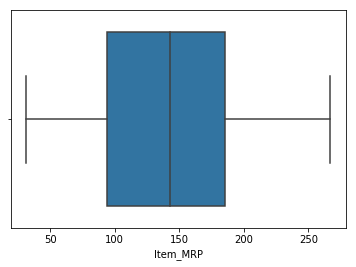

In [41]:
sns.boxplot(data.Item_MRP)
plt.show()

### Checking for outliers in the Item_Visibility

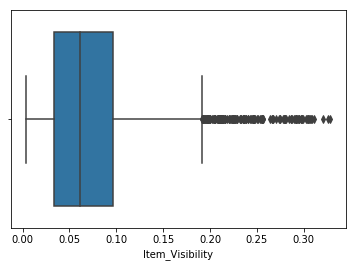

In [42]:
sns.boxplot(data.Item_Visibility)
plt.show()

In [43]:
q1, q3 = np.percentile(data.Item_Visibility, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [44]:
lower_bound, upper_bound

(-0.06190515649999999, 0.19140284349999998)

In [45]:
len(data[data["Item_Visibility"] > upper_bound]) / len(data)
# TODO: Do we need to remove the 2% outliers here?

0.018186084711955885

In [46]:
q1, q3 = np.percentile(data.Item_Weight, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound, upper_bound

(-0.7249999999999996, 26.035)

In [47]:
data[data.Item_Weight < lower_bound]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


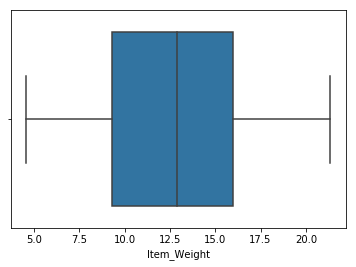

In [48]:
sns.boxplot(data.Item_Weight)
plt.show()

In [49]:
pandas_profiling.ProfileReport(data)

Number of variables,12
Number of observations,8523
Total Missing (%),2.4%
Total size in memory,799.1 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


We're removing the **Outlet_Size** column, because this column has missing values and maybe it's not so important. However, later we can try to fit model including this variable to see the accuracy difference.

In [50]:
cleaned_data = data.copy()

In [51]:
cleaned_data.drop(columns = ["Outlet_Size", "Item_Identifier"], inplace = True)

In [52]:
cleaned_data = pd.get_dummies(cleaned_data, drop_first = True)
cleaned_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,19.20,0.115029,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.058267,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [53]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 35 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Item_Outlet_Sales                  8523 non-null float64
Item_Fat_Content_Regular           8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_Type_Fruits and Vegetables    8523 non-null uint8
Item_Type_Hard Drinks              8523 non-null uint8
Item_Type_Health and Hygiene       8523 non-null uint8
Item_Type_Household                8523 non-null uint8
Item_Type_Meat                     8523 non-null uint8
Item_

In [54]:
cleaned_data["Outlet_Years"] = 2013 - cleaned_data.Outlet_Establishment_Year

In [55]:
cleaned_data.drop(columns = "Outlet_Establishment_Year", inplace = True)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = cleaned_data.drop(columns = "Item_Outlet_Sales")
y = cleaned_data.Item_Outlet_Sales

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6392, 34)
(6392,)
(2131, 34)
(2131,)


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

C:\Users\venci\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\venci\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\venci\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
print(X_train.shape)
print(X_test.shape)

(6392, 34)
(2131, 34)


In [70]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import cross_validate

# TODOs
* Use the cross-validation
* Research about Multiple Linear Regression, Lassso and Ridge Regressions

In [75]:
print("Train scores:", scores["train_score"])
print()
print("Test scores:", scores["test_score"])
print(scores["test_score"].mean())

Train scores: [0.56402915 0.56131212 0.56584566 0.56353285 0.56861092 0.56210517
 0.56199536 0.56471326 0.56169562 0.56535864]

Test scores: [0.55962897 0.58186661 0.54123426 0.56154277 0.50895728 0.57578458
 0.57711818 0.55226276 0.57920107 0.54746812]
0.5585064596602811


C:\Users\venci\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [77]:
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [83]:
import sklearn.metrics as metrics

In [90]:
print(metrics.explained_variance_score(y_test, predictions))
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))

0.5675877484356491
803.7553843630235
1193443.3697162105


In [87]:
for actual, prediction in zip(y_test, predictions):
    print(actual, prediction)

1743.0644 1387.2696833005898
356.8688 767.7696833005898
377.5086 908.3321833005898
5778.4782 4194.76968330059
2356.9320000000002 3291.76968330059
865.54 600.3321833005898
4613.994000000001 4776.76968330059
2410.8618 2012.7696833005898
1948.1308 1324.7696833005898
1937.4779999999998 2748.76968330059
210.3928 -235.9490666994102
255.0014 2104.76968330059
4541.4218 3914.76968330059
657.8104 951.2696833005898
578.5802 771.7696833005898
4229.1616 4375.76968330059
1267.0174 1795.2696833005898
2388.8904 1835.7696833005898
1797.66 1992.3321833005898
4447.544 3234.76968330059
2570.6538 3131.26968330059
1779.6834 2727.26968330059
4211.185 2843.26968330059
3912.2408 2536.33218330059
2366.919 4242.76968330059
1298.31 2202.76968330059
149.805 856.7696833005898
3916.2356 3808.33218330059
2065.3116 3166.76968330059
3029.39 3900.33218330059
788.3072 887.7696833005898
2566.659 2819.76968330059
575.2512 2435.76968330059
1464.76 3135.76968330059
617.8624 596.7696833005898
792.302 1459.2696833005898
505.34

3139.9128 2886.76968330059
1418.154 1180.7696833005898
258.3304 -907.2303166994102
1289.6546 1714.7696833005898
3744.4592 3175.26968330059
1384.1982 3179.76968330059
619.8598 1575.2696833005898
372.848 284.7696833005898
3137.2496 2779.76968330059
1235.7248 1403.7696833005898
1286.3256 848.3321833005898
2614.5966 2195.76968330059
916.1408 1600.7696833005898
308.9312 592.0509333005898
4769.1254 4076.76968330059
1034.6532 847.7696833005898
1840.9370000000001 4275.76968330059
3579.3408 3753.26968330059
7190.64 3835.76968330059
3894.93 2604.33218330059
2428.8384 2527.26968330059
1113.2176 1056.3321833005898
1860.2452 1352.3321833005898
3773.7544 3770.76968330059
2693.8268 2618.76968330059
131.8284 716.7696833005898
1448.115 1340.7696833005898
249.0092 2064.05093330059
3829.0158 2135.26968330059
2748.4224 3340.76968330059
519.3240000000001 647.2696833005898
1943.4702 1395.2696833005898
2395.5484 2639.76968330059
2345.6134 2943.26968330059
1062.6168 1371.2696833005898
810.9444 1998.7696833005

1010.6844 1539.2696833005898
1431.47 2380.33218330059
942.107 3075.76968330059
1958.1178 1787.2696833005898
3146.5708 3012.33218330059
591.8962 956.7696833005898
2759.0752 2623.76968330059
6410.3224 3543.26968330059
690.4346 680.3321833005898
3047.3666 3522.76968330059
3439.5228 2816.76968330059
2884.2456 2595.76968330059
834.9132 764.3321833005898
3193.1768 2452.33218330059
1960.781 1845.2696833005898
491.3604 927.7696833005898
1150.5024 2159.76968330059
2226.4352 995.2696833005898
635.1732 300.7696833005898
718.3982 977.2696833005898
700.4216 2884.33218330059
158.4604 952.0509333005898
1794.3310000000001 2727.26968330059
958.752 1148.3321833005898
1012.6818 956.7696833005898
1438.128 2547.76968330059
5033.448 4147.76968330059
974.0654 998.7696833005898
1057.9562 2541.26968330059
2804.3496 3795.76968330059
2093.2752 2882.76968330059
5243.8408 3782.76968330059
3395.58 2079.26968330059
892.172 707.7696833005898
157.1288 -1243.9490666994102
5880.3456 4320.76968330059
3974.8259999999996 4

4354.332 4824.76968330059
2181.1608 1644.7696833005898
2013.3792 2316.76968330059
1677.816 2394.76968330059
251.6724 754.7696833005898
1251.704 2176.33218330059
1406.1696 1603.2696833005898
1025.9978 842.7696833005898
3078.6592 3095.76968330059
2067.3089999999997 3783.76968330059
1737.7379999999998 1933.2696833005898
510.6686 607.2696833005898
1004.0264 3660.76968330059
4594.02 3024.33218330059
1657.1762 1500.3321833005898
296.281 -911.9490666994102
1677.816 3061.26968330059
323.5788 616.7696833005898
1877.556 3138.76968330059
3835.008 3504.33218330059
6465.5838 4158.76968330059
3137.2496 2647.26968330059
2069.3064 4162.76968330059
2451.4756 2875.76968330059
3098.6332 3886.76968330059
120.5098 48.769683300589804
4035.4138 3536.33218330059
958.752 1681.2696833005898
1171.808 2636.76968330059
2439.4912 2472.33218330059
109.1912 -179.9490666994102
4913.604 4070.76968330059
3782.4098 2661.26968330059
2947.4966 2427.76968330059
3735.138 3988.33218330059
1150.5024 887.7696833005898
2306.9970

# TODOs
* Add the notes for each cell. Explain what we're doing. Why we are making our decision and so on.
* Preprocess the data. Convert categorical features into dummy variables. Normalize the numeric features.
* Split the data into training and testing sets again.
* Fit some models (Linear Regression, LASSO, RIDGE)
* Compare our results with other results. Research for a similar work.
* Don't rewrite the original data

## Resources
* [How to Increase Sales Retail](https://www.vendhq.com/blog/how-to-increase-sales-retail/)